#### Імпорт

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Функції для візуалізації

In [2]:
def plot_data(data):
    plt.figure(figsize=(10, 5), dpi=80)
    plt.scatter(data[:, 1], data[:, 2], 
                c=data[:, -1], 
                s=4,
                cmap=plt.cm.RdBu,
                marker="o", 
                alpha = 1)

def plot_cost(J_history):
    plt.title("Cost")
    plt.plot(J_history)
    plt.ylim(ymin=0)
    plt.grid(True)
    
def plot_decision_boundary(data, theta):
    plot_data(data)
    x_boundary = np.array([data[:, 1].min(), data[:, 1].max()])
    y_boundary = -(theta[1]*x_boundary + theta[0])/theta[2]
    plt.plot(x_boundary, y_boundary, linewidth=2, alpha=0.5, c="g")

#### Створення фіктивних даних та їх обробка

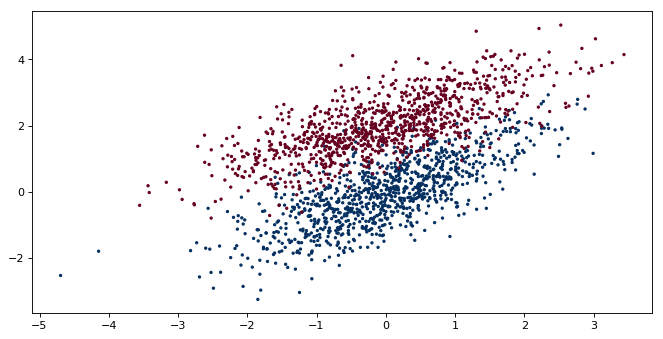

In [8]:
np.random.seed(100)
num_rows = 1000
x1 = np.random.multivariate_normal([0, 0], [[1, 0.75], [0.75, 1]], num_rows)
x2 = np.random.multivariate_normal([0, 2], [[1, 0.5], [1, 1]], num_rows)

# Adding bias and labels
data = np.append(np.ones([num_rows, 1]), 
                 np.append(x1, 
                           np.ones([num_rows, 1]), 
                           axis=1), 
                 axis=1)
data = np.append(data, 
                 np.append(np.ones([num_rows, 1]), 
                           np.append(x2, 
                                     np.zeros([num_rows, 1]), 
                                     axis=1), 
                           axis=1), 
                 axis=0)
plot_data(data)

np.random.shuffle(data)
index = int(data.shape[0] * 0.7)
X_train, X_test = data[:index, :-1], data[index:, :-1]
y_train, y_test = data[:index, -1][:, np.newaxis], data[index:, -1][:, np.newaxis]

theta = np.random.rand(X_train.shape[1], 1)

#### функції для регресії

In [9]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def h(X, theta):
    return sigmoid(X @ theta)
    
def J(X, y, theta):
    m = X.shape[0]
    cost = - y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))
    return np.sum(cost)

def logistic_regression(X, y, theta, alpha=1, steps=1000, tolerance=0, debug=False):
    J_history = []
    J_last = J(X, y, theta)
    
    # Gradient descent
    for step in range(steps):
        theta = theta - alpha * X.T @ (h(X, theta) - y)
        
        J_current = J(X, y, theta)
        J_history.append(J_current)
        
        if abs(J_current - J_last) < tolerance:
            break
        else:   
            J_last = J_current
    
    if debug:
        plot_cost(J_history)
        
    return theta

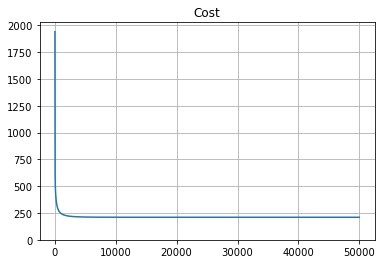

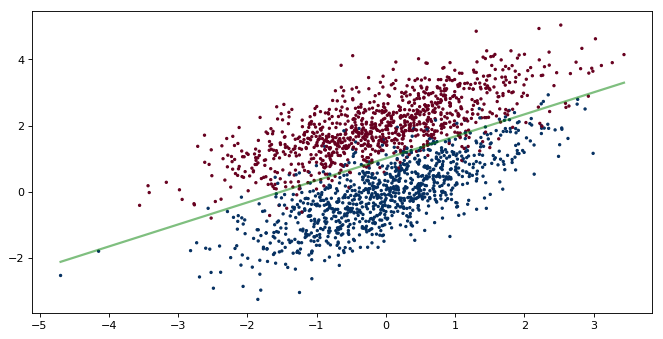

In [10]:
theta = logistic_regression(X_train, y_train, theta, alpha=5e-5, steps=50000, debug=True)
plot_decision_boundary(data, theta)

#### Перевірка точності

In [11]:
preds = np.round(h(X_test, theta))
(preds == y_test).mean()

0.93999999999999995

#### Порівняння з sklearn 

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=False, max_iter=50000, tol=1)
clf.fit(X_train, y_train.ravel())
preds = np.round(h(X_test, clf.coef_.T))
(preds == y_test).mean()

0.93833333333333335